# Домашнее задание по Сотовым Системам Связи



<table>
  <caption>Исходные данные</caption> 
  <tr>
    <th rowspan="2" class="first"><div align="center">№</div></th>
    <th rowspan="2"><div align="center">Группа</div></th>
    <th rowspan="2"><div align="center">Студент</div></th>
    <th rowspan="2"><div align="center">Тип местности</div></th>   
    <th colspan="2"><div align="center">Размер территории, км</div></th>
    <th rowspan="2"><div align="center">N<sub>аб</sub></div></th>  
    <th rowspan="2"><div align="center">T<sub>шэ</sub>, К</div></th>  
    <th rowspan="2"><div align="center">Н<sub>бс</sub>, м</div></th> 
    <th rowspan="2"><div align="center">L<sub>обр</sub>, дБ</div></th> 
    <th colspan="2"><div align="center">MIMO</div></th>
    <th rowspan="2"><div align="center">C, бит/с</div></th> 
    <th rowspan="2"><div align="center">P<sub>отк</sub></div></th> 
    <th rowspan="2"><div align="center">P<sub>ош</sub></div></th> 
  </tr>
  <tr>
    <td class="first"><div align="center">L1</div></td>
    <td class="first"><div align="center">L2</div></td>
    <td class="first"><div align="center">N<sub>пер</sub></div></td>
    <td class="first"><div align="center">N<sub>пр</sub></div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">29</div></td>
    <td><div align="center">РЛ1-92</div></td>
    <td><div align="center">Кузищин Дмитрий</div></td>
    <td><div align="center">Город</div></td>
    <td><div align="center">17</div></td>
    <td><div align="center">19</div></td>
    <td><div align="center">1.5e6</div></td>
    <td><div align="center">920</div></td>
    <td><div align="center">40</div></td>
    <td><div align="center">4.4</div></td>
    <td><div align="center">6</div></td>
    <td><div align="center">6</div></td>
    <td><div align="center">5.09e4</div></td>
    <td><div align="center">8.7e-7</div></td>
    <td><div align="center">9.8e-7</div></td>
  </tr>
</table>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import numpy as np
import math

In [2]:
L1, L2 = 17000, 19000
N_ab = 1.5e6
T_sh = 920
h_bs = 40
L_ob = 4.4
N_res, N_tr = 6, 6
C = 5.09e4
P_d, P_er = 8.7e-7, 9.8e-7

## 1. Анализ исходных данных

`Активность` абонентов является определяющим фактором, влияющим на число базовых станций (БС) необходимых для покрытия выбранной территории. В зависимости от активности абонентов следует изменять расположение базовых станций. С ростом активности абонентов необходимо уменьшать расстояние между БС, а так же увеличивать количество БС и уменьшать мощность передатчиков используемых в БС для достижения необходимого качества связи.

<table>
<tr>
<th> Активность абонентов определяется:  </th>
<th> Плотность населения в свою очередь определяется: </th>
</tr>
<tr>
<td>
                             
* <div align="center">типом местности</div>
* <div align="center">плотностью населения</div>

</td>
<td>

* <div align="center">количеством абонентов</div>
* <div align="center">размером территории</div>

</td>
</tr>
</table>

Ниже приведены типовые значения активности абонентов в зависимости от местности покрытия сотовой системой связи.

|Тип местности| Активность абонентов|
|-------------|---------------------|
|Сельская местность, деревни|1…3%|
|Крупные транспортные узлы и магистрали|2…5%|
|Небольшие поселения, села поселки|3…6%|
|Небольшие города, в том числе поселки городского типа|4…7%|
|Крупные города|5…8%|
|Бизнес центры|6…10%|

In [3]:
A_ab = 0.06

<table>
<tr>
<th><div align="center">Определение MIMO:</div></th>
<th><div align="center">Графическое представление системы с MIMO:</div></th>
</tr>
<tr>
<td>
                             
`Применение MIMO (Multiple Input Multiple Output)` - метод пространственного кодирования сигнала, позволяющий увеличить полосу пропускания канала, в котором передача данных и прием данных осуществляются системами из нескольких антенн. Передающие и приёмные антенны разносят так, чтобы корреляция между соседними антеннами была слабой.

</td>
<td>

![Альтернативный текст](MIMO_with_building.png)

</td>
</tr>
</table>

Применение MIMO антенных систем размерностью (m x n) позволяет увеличить пропускную способность системы за счет некоторого увеличения энергетического потенциала при декодировании сигнала и возможности подавления помех, вызванных многолучевым распространением сигнала.

MIMO технология применяется в зависимости от местности: в городской среде MIMO применяется для уменьшения количества БС в зоне городской застройки (увеличении зоны покрытия), в сельской местности MIMO применяют обычно для повышения скорости передачи информации, но в данном случае используется крайне редко.

`Скорость передачи данных` (C) – это минимальная скорость, обеспечиваемая при подключении абонента, то есть такую скорость сотовая система сможет обеспечить в случае максимальной нагрузке (максимально допустимом количестве активных абонентов)

`Вероятность отказа в соединении` (P<sub>отк</sub>) – предельное значение для системы, рассчитанное по формуле Эрланга.

`Вероятность ошибки на бит` (P<sub>ош</sub>) – задается в качестве характеристики помехоустойчивости канала связи с учетом модуляции и выбранного при расчете помехоустойчивого кодирования.

**Цели расчёта сети сотовой связи:**

* удовлетворение всем параметрам заданным в техническом условии (ТУ)
* минимизация  количества базовых станций 
* суммарная мощность передатчиков БС не более 10...50 Вт

## 2. Оценка помехоустойчивости системы

При построении сотовой системы следует изначально выбрать размер кода символа и типа помехоустойчивого кодирования. В зависимости от скорости передачи информации следует использовать различные различные методы кодирования.

In [4]:
def choiceCodingMethod(C):
    if C > 26e3:
        print("Следует использовать турбо-кодирование")
    else:
        print("Следует использовать свёрточное кодирование")

In [5]:
choiceCodingMethod(C)

Следует использовать турбо-кодирование


Значения помехоустойчивости для различных видов модуляции, вероятности ошибки на бит, избыточности и способа
кодирования представлены в таблице:

![Таблица 2](Noise_correcting_coding.png)

Визуализируем на примере QPSK и 64QAM сигнальные созвездия с хорошим отношением сигнал/помеха.

<table>
<tr>
<th><div align="center">QPSK:</div></th>
<th><div align="center">64QAM:</div></th>
</tr>
<tr>
<td>
                             
![Альтернативный текст](QPSK.png)

</td>
<td>

![Альтернативный текст](64QAM.png)

</td>
</tr>
</table>

Так же продемонстрируем зависимость вероятности ошибки от увеличения уровня помехи на примере использования сигнального созвездия 8PSK. 

<table>
<tr>
<th><div align="center">8PSK в случае низкого отношения сигнал/помеха:</div></th>
<th><div align="center">8PSK в случае приемлемого отношения сигнал/помеха:</div></th>
</tr>
<tr>
<td>
                             
![Альтернативный текст](8PSKNoise.png)

</td>
<td>

![Альтернативный текст](8PSKNoiseLow.png)

</td>
</tr>
</table>

В соответствии с условием будем рассматривать вероятность ошибки 1e-7 => предварительно возьмём 16QAM K<sub>пу</sub> = 2/3 => Значение помехоустойчивости = 6.9 дБ

In [9]:
k_ncc = 2/3 # отношение объема полезных данных к передаваемым с учетом помехоустойчивого кодирования
b = 1/4     # число бит несущего кода на один информационный бит при выбранном типе модуляции
B = 1       # база сигнала, обратное значение индекса модуляции (сколько чипов идет на один бит несущего кода)
m_v = 1     # размерность MIMO на передающей стороне (скоростное)
k_pr = 1.8  # коэффициент расширения полосы для обеспечения требуемого уровня помехи при использовании соседний каналов (защ)
L_ncc = 6.9 # минимальное значение сигнал/помеха необходимое для достижения заданной вероятности ошибки

## 3. Расчёт полосы канала связи

Выделение частотного диапазона для системы сотовой связи требует достаточно сложного обоснования и согласования у соответствующих комиссий. В РФ распределение частотного спектра регулируется государственной комиссией по радиочастотам (ФЗ № 126 от 03.07.2003, ред. 03.08.2018). Следовательно, начинать расчет системы сотовой связи следует с оценки требований системы к полосе канала связи. 

Система сотовой связи будет строго ограничена по частотному диапазону, независимо от выбора способа многостанционного доступа. Данный частотный ресурс будет делиться между каналами связи абонентской станции (АС) и БС. Следовательно предварительно необходимо оценить требования, которые предъявляются к частотному ресурсу одного канала АС-БС

P.S. Частотный ресурс, выделяемый на один канал связи принято называть `полосой канала связи`, это связано с историческим распространением частотного разделения каналов (FDMA).

In [10]:
def channelStrip(__C, __b, __B, __k_ncc, __m_v, __k_pr):
    __dF_ch = (__k_pr * __C * __b * __B)/(__k_ncc * __m_v)
    print(__dF_ch)
    return __dF_ch

dF_ch = channelStrip(C, b, B, k_ncc, m_v, k_pr)

34357.5


В результате для выбранных технических решений можно оценить помехоустойчивость системы, она должна с одной стороны быть наибольшей, а с другой – необходимо эффективно использовать частотный диапазон (увеличить количество каналов, обеспечиваемых одной БС). С увеличением размерности кластера увеличивается минимальное отношение сигнал/помеха, обеспечиваемое в соте. Следовательно, при увеличении размера кластера можно использовать более сложные виды модуляции, тем самым увеличивать скорость передачи информации, но понижать ёмкость сети и увеличивать требования к мощности используемого оборудования (энергетическая неэффективность).

Ниже представлена таблица значений типовых отношений сигнал/помеха на краю соты кластера от высоты БС.

<table>
  <caption>Отношение сигнал/помеха на краю соты кластера размерностью n, дБ</caption> 
  <tr>
    <th rowspan="2" class="first"><div align="center">Высота БС, м</div></th>
    <th colspan="6"><div align="center">Размер кластера</div></th>
  </tr>
  <tr>
    <td class="first"><div align="center">1</div></td>
    <td class="first"><div align="center">3</div></td>
    <td class="first"><div align="center">4</div></td>
    <td class="first"><div align="center">7</div></td>
    <td class="first"><div align="center">9</div></td>
    <td class="first"><div align="center">12</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">20</div></td>
    <td><div align="center">3,2</div></td>
    <td><div align="center">6,5</div></td>
    <td><div align="center">9,2</div></td>
    <td><div align="center">14,0</div></td>
    <td><div align="center">16,1</div></td>
    <td><div align="center">18,5</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">30</div></td>
    <td><div align="center">2,6</div></td>
    <td><div align="center">5,9</div></td>
    <td><div align="center">8,5</div></td>
    <td><div align="center">13,2</div></td>
    <td><div align="center">15,2</div></td>
    <td><div align="center">17,5</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">40</div></td>
    <td><div align="center">2,2</div></td>
    <td><div align="center">5,5</div></td>
    <td><div align="center">8,1</div></td>
    <td><div align="center">12,6</div></td>
    <td><div align="center">14,6</div></td>
    <td><div align="center">16,8</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">50</div></td>
    <td><div align="center">1,9</div></td>
    <td><div align="center">5,2</div></td>
    <td><div align="center">7,7</div></td>
    <td><div align="center">12,1</div></td>
    <td><div align="center">14,1</div></td>
    <td><div align="center">16,3</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">60</div></td>
    <td><div align="center">1,7</div></td>
    <td><div align="center">5,0</div></td>
    <td><div align="center">7,4</div></td>
    <td><div align="center">11,7</div></td>
    <td><div align="center">13,7</div></td>
    <td><div align="center">15,8</div></td>
  </tr>
</table>

Предварительно для значения высоты БС 40 м и выбранного ранее вида модуляции минимальный размер кластера равен 4.

In [15]:
N_cl = 3     # размер выбранного кластера 
N_sec = 1    # число секторов в соте
L_cl = 5.5  # значение сигнал/помеха на краю любой соты одного диапазона

Изобразим топологию выбранного кластера:

![Альтернативный текст](Claster.png)

## 4. Выбор многопользовательского доступа 

Существует три основных способа многопользовательского доступа (разделения ресурса сети между абонентами):

* `частотное разделение (FDMA)`
* `временное разделение (TDMA)`
* `кодовое разделение (CDMA)`

В чистом виде данные методы никогда не использовались даже в 1 поколении сотовых систем связи. Методы доступа обычно используются совместно (гибридный формат) в различных пропорциях. Разберём их подробнее:

>`FDMA` является наиболее распространенным методом разделения базовых станций. Разделены по частотам могут быть не только станции, но и абоненты в пределах одной соты. В этом случае в сети допускается асинхронная работа, но следует выбирать коэффициент запаса достаточно большой - в пределах **(1,7; 1,9)** из-за необходимости выделения защитных интервалов частот. 
>>* К сожалению, `FDMA` сильнее всего подвержен замираниям сигнала, поэтому его применение в городской среде без дополнительных конструктивных решений крайне неэффективно.
>>* В настоящее время стандарты, использующие `FDMA` в качестве основного метода многопользовательского доступа, применяются в сельских и малозаселённых районах, а также в качестве систем с высокой надежностью передачи голосовых данных, например, в аварийных системах.

>`TDMA` применяется не во всех стандартах сотовой связи, однако активно используется для передачи данных пакетным способом, активно применяется со времен стандартов второго поколения сотовой связи. Необходимо выбирать коэффициент запаса **(1,1; 1,3)**
>>`TDMA` позволяет передавать пакеты данных с высокой скоростью, однако очень требователен к синхронизации АС и БС. Данный метод применим для всех типов местности.

>`CDMA` наиболее активно использовался в американских стандартах сотовой связи со времен 2 поколения. В данном случае коэффициент запаса необходимо выбирать в пределах **(1,2; 1,6)**.
>>* При использовании `CDMA` в качестве основного метода разделения абонентов часто используется кластер с размерностью 1, то есть вся сеть работает на одной частоте.
>>* Для увеличения емкости общий диапазон системы делится на несколько поддиапазонов и на каждой БС используется несколько каналов `CDMA`, разделённых по частоте – метод `MC-CDMA`. 
>>* В настоящее время применяется достаточно широко для любых типов местности

В качестве основного метода многопользовательского доступа для нашей сотовой системы выберем FDMA. Следовательно k<sub>зап</sub> = 1.7

In [16]:
k_margin = 1.7

## 5. Выбор частотного диапазона

<table>
<tr>
<th> <div align="center">Доступные полосы частот и несущие: </div> </th>
<th> <div align="center">Пояснение:</div> </th>
</tr>
<tr>
<td>
         
|Несущая частота, МГц| 450 | 900 | 1800 | 2100 | 2600 |
|--------------------|-----|-----|------|------|------|
|    Полоса, МГц     |  4  |  20 |  40  |  60  |  70  |
    
</td>
<td>

* <div align="left">Основные несущие и выделяемые для них полосы приведены в таблице</div>
* <div align="left">Также необходимо помнить, что чем больше частота сигнала, тем больше затухание радиоволн при распространении над заданным типом местности.</div>

</td>
</tr>
</table>

Предварительно выберем полосу системы в 60 МГц с несущей 2100 МГц.

In [17]:
dF_sys = 60e6
f0 = 2100e6

## 6. Расчёт количества базовых станций

Число каналов, которое обеспечивается на одной БС:

In [13]:
def channelsNumberBaseStation(__dF_sys, __dF_ch, __N_cl, __N_sec, __k_margin):
    __M = int(__dF_sys/(__dF_ch * __N_cl * __N_sec * __k_margin))
    print(__M)
    return __M

In [18]:
M = channelsNumberBaseStation(dF_sys, dF_ch, N_cl, N_sec, k_margin)

342


In [27]:
def Erlang(__M, __A_sys):
    if(M <= 120):
        first = np.power(np.power(__A_sys, __M/2)/np.power((np.math.factorial(__M)), 1/2), 2)
        second = [np.power(np.power(__A_sys, k/2)/np.power(np.math.factorial(k), 1/2), 2) for k in range(M+1)]
        second = sum(second)
        p = first/second
    else:
        first = (np.power((__A_sys * math.e / __M), __M)*(1 / np.sqrt(2 * np.pi * __M)))
        second = np.power(math.e, -1 * __A_sys * (1 - np.power(math.e, (-1 * __M * math.log(1.85114 * __A_sys)) / (__A_sys - 0.5))))
        p = first * second
    return p

In [29]:
N_ab_in_sot = 1

while(1):
    A_sys = N_ab_in_sot * A_ab
    P_d_calc = Erlang(M, A_sys)
    if(P_d_calc < P_d):
        N_ab_in_sot += 1
    else:
        break

N_ab_in_sot -= 1
A_sys = N_ab_in_sot * A_ab
P_d_calc = Erlang(M, A_sys)

print("Число абонентов в соте: ", N_ab_in_sot)
print("Суммарная активность в одной соте: ", A_sys)
print("Вероятность отказа расчётная: ", P_d_calc)
print("Вероятность отказа по условию : ", P_d)

Число абонентов в соте:  4418
Суммарная активность в одной соте:  265.08
Вероятность отказа расчётная:  8.631799186465817e-07
Вероятность отказа по условию :  8.7e-07


In [35]:
def SquareSot(__A_sys, __A_ab, __N_sec, __L1, __L2, __N_ab):
    __S = (__A_sys/__A_ab) * (__N_sec) * (__L1 * __L2 / __N_ab)
    __R = np.sqrt((2 * __S) / (3 * np.sqrt(3)))
    print("Площадь соты составляет [кв.м]: ", __S)
    print("Радиус соты составляет [м]: ", __R)
    return __S, __R

In [37]:
S_sot, R_sot = SquareSot(A_sys, A_ab, N_sec, L1, L2, N_ab)

Площадь соты составляет [кв.м]:  951342.6666666667
Радиус соты составляет [м]:  605.1214449411933


In [39]:
def numberBS(__A_ab, __A_sys, __N_ab, __N_sec):
    __N_BS = int((__A_ab * __N_ab) / (__A_sys * __N_sec)) + 1 
    print("Число базовых станций, обеспечивающих покрытие заданной зоны", __N_BS)
    return __N_BS

In [40]:
N_sot = numberBS(A_ab, A_sys, N_ab, N_sec)

Число базовых станций, обеспечивающих покрытие заданной зоны 340


P.S. Данные формулы используются для приблизительной оценки реальных систем сотовой связи в следствии следующих причин:

* На реальной местности возможен большой перепад плотности населения, за счет чего невозможно выделить среднее значение активности абонента для большой территории
* Часто соты устанавливаются из соображений пиковой активности абонентов. В основном БС устанавливают так, чтобы обеспечить пиковую пропускную способность (достичь максимальной скорости передачи информации). Однако в реальных условиях часто ориентируются на пиковую активность абонентов, то есть устанавливают БС чаще, чем требуется из исходных расчётов. Например, вокруг крупного бизнес центра может быть несколько БС для разделения нагрузки, а не одна с большой емкостью (для обеспечения той же скорости передачи, при увеличении активности абонентов, необходимо увеличить количество БС для покрытия данной территории);
* При уточнении расчета на последующих стадиях производится перераспределение БС с учетом распространения сигнала на местности

## 7. Оценка потерь на распространение сигнала. Модель Окамуры-Хата.

Энергетический расчет для сотовых систем связи без учета особенностей распространения сигнала в зависимости от местности даёт грубую оценку энергетики, так как рельеф и застройка местности в зоне действия сети могут быть различные и их сложно аппроксимировать шероховатостью.

Существует несколько статистических моделей потерь при распространении, основанных на экспериментальной оценке потерь для различных условий. 

Статистические модели в основном делятся по следующей классификации:

* открытые районы, участки с очень небольшим числом препятствий, таких как деревья или строения
* пригородные зоны, участки с небольшими строениями и деревьями, находящимися поблизости от подвижного объекта
* городские районы, участки, плотно застроенные многоэтажными домами

Мы будем использовать для расчёта потерь на распространие модель Окамуры-Хата

In [49]:
def alfa(__h_ab, __f0, __locality):
    if(__locality == "Suburb" or __locality == "Countryside"):
        return (1.1 * math.log10(__f0) - 0.7) * __h_ab - 1.56 * math.log10(__f0) + 0.8  # дБ
    if(__locality == "City"):
        if(__f0 < 400):
            print("alfa:", 8.28 * (math.log10(91.54 * __h_ab))**2 - 1.1)
            return 8.28 * (math.log10(91.54 * __h_ab))**2 - 1.1
        else:
            print("alfa:", 3.2 * (math.log10(11.755 * __h_ab))**2 - 4.97)
            return 3.2 * (math.log10(11.755 * __h_ab))**2 - 4.97

In [50]:
def propagationLoss(__f0, __h_bs, __R_sot, __h_ab, __locality):
    
    liambda = 3e8 / __f0
    __f0 = __f0 / 1e6                                         # преобразование в МГц
    L0 = 20 * math.log10(4 * np.pi * __R_sot / liambda)       # дБ
    print("L0:", L0)
    
    L = 69.55 + 26.16 * math.log10(__f0) - 13.82 * math.log10(__h_bs) \
        + (44.9 - 6.551 * math.log10(__h_bs)) * math.log10(__R_sot / 1000) \
        - 3.2 * (math.log10(11.75 * __h_ab))**2 - alfa(__h_ab, __f0, __locality) - L0  # дБ
    
    if(__locality == "City"):
        return L
    if(__locality == "Suburb"):
        return L - 2 * math.log10((__f0 / 28)**2) - 5.4
    if(__locality == "Countryside"):
        return L - 4.78 * (math.log10(__f0))**2 + 18.33 * math.log10(__f0) - 40.94

In [53]:
h_ab = 1.7 # 1.6...1.8
loss = propagationLoss(f0, h_bs, R_sot, h_ab, "City") # [City, Suburb, Countryside]
print("Потери на распространение составляют: ", loss, "[дБ]")

L0: 94.52300896468032
alfa: 0.4435887794172979
Потери на распространение составляют:  26.434452550440085 [дБ]


## 8. Расчёт энергетики линии радиосвязи

При проектировании сотовой системы связи одной из важных характеристик является требуемая `мощность передатчика базовой станции`, ее можно рассчитать, воспользовавшись уравнением радиосвязи.

В расчёте будем полагать, что необходимо рассчитать суммарную мощность `всех передатчиков` на `одной базовой станции`,
которые используются для `всех секторов`, `всех антенн MIMO` и `всех каналов базовой станции`.

При расчёте энергетики необходимо учитывать режим использования MIMO. Разберём его подробнее:

>`Если MIMO используется для увеличения энергетики` 
>>В данном случае мощность выделяется на каждую из передающих антенн независимо, а на приёмной стороне потоки складываются когерентно.

>`Если MIMO используется для увеличения пропускной способности в m раз`
>>мощность делится поровну между антеннами, каждая антенна излучает свой информационный поток, каждый из них принимается m антеннами, сигнал которых складывается когерентно. В этом случае увеличения энергетики канала не происходит.



In [81]:
m_p = 6                # размерность MIMO на передающей стороне (мощностное)
SDR = L_ncc + L_cl     # дБ
print(SDR)
SNR_N = 10**(SDR / 10)
print(SNR_N)

12.4
17.378008287493753


Коэффициент усиления антенн для базовой станции (`G_tran`):
* Без секторного разделения абонентов можно взять равным 3 дБ
* Для БС содержащей 3 отдельных сектора – 5 дБ
* Для БС с 6-ю секторами – 7 дБ 

In [83]:
G_tran = 3
G_tran_N = 10**(G_tran / 10)
print(G_tran_N)

1.9952623149688795


In [90]:
def powerTransmitter(__SNR_N, __M, __N_sec, __R_sot, __G_tran_N, __f0, __loss, __L_ob, __C, __T_sh, __m_p):
    k_b = 1.380649e-23
    liambda = 3e8 / __f0
    L_ob_N = 10**(__L_ob / 10)
    loss_N = 10**(__loss / 10)
    print("Потери:", L_ob_N * loss_N)
    first = __SNR_N * __M * __N_sec / __m_p
    second = ((4 * np.pi * __R_sot)**2) / (__G_tran_N * (liambda**2))
    third = __C * k_b * __T_sh * loss_N * L_ob_N
    return first * second * third

In [91]:
P_trans = powerTransmitter(SNR_N, M, N_sec, R_sot, G_tran_N, f0, loss, L_ob, C, T_sh, m_p) 
print("Суммарная мощность подводимая к БС:", P_trans, "[Вт]") # суммарная мощность передатчиков БС не более 10...50 Вт

Потери: 1211.8399207627863
Суммарная мощность подводимая к БС: 1.1020718249024435 [Вт]


In [87]:
3e8 / f0

0.14285714285714285

## 9. Расчёт максимальной скорости передачи данных

При уменьшении расстояния между абонентской и базовой станциями, у линии связи появляется избыточный энергетический потенциал, следовательно, увеличивается отношение сигнал шум. За счет этого увеличения можно увеличить скорость передачи информации.

Для увеличения скорости передачи данных можно варьировать числом бит в модуляционном символе  , типом и скоростью помехоустойчивого кодирования и режимами работы MIMO. Полоса канала связи и прочие рассчитанные параметры при этом остаются неизменными.

In [92]:
def signalNoise(__P_trans, __m_p, __M, __N_sec, __R, __G_tran_N, __f0, __loss, __L_ob, __C, __T_sh):
    k_b = 1.380649e-23
    liambda = 3e8 / __f0
    L_ob_N = 10**(__L_ob / 10)
    loss_N = 10**(__loss / 10)
    first = (__P_trans * __m_p) / (__M * __N_sec)
    second = (__G_tran_N * (liambda**2)) / ((4 * np.pi * __R)**2)
    third = 1 / (__C * k_b * __T_sh * loss_N * L_ob_N)
    return first * second * third

In [93]:
def rSotCalc(__SNR, __P_trans, __m_p, __M, __N_sec, __G_tran_N, __f0, __loss, __L_ob, __C, __T_sh):
    k_b = 1.380649e-23
    liambda = 3e8 / __f0
    
    L_ob_N = 10**(__L_ob / 10)
    loss_N = 10**(__loss / 10)
    __SNR_N = 10**(__SNR / 10)
    
    first = (__P_trans * __m_p) / (__M * __N_sec)
    second = (__G_tran_N * (liambda**2)) / (__SNR_N * (4 * np.pi)**2)
    third = 1 / (__C * k_b * __T_sh * loss_N * L_ob_N)
    
    return np.sqrt(first * second * third)

In [96]:
def shannon(__dF_ch, __k_pr, __N_res, __m_v, __SNR):
    dF = __dF_ch / __k_pr
    mimo = min([__m_v, __N_res])
    return dF * mimo * math.log2(1 + __SNR) / 1000

In [97]:
shannon(dF_ch, k_pr, N_res, m_v, SNR_N)

80.16575384183115

In [99]:
dF_ch / k_pr

19087.5

#### Вычислим предельную скорость передачи в соответствии с формулой Шеннона

In [100]:
R_massive = np.linspace(40, R_sot, 1000)
SNR_calc = [signalNoise(P_trans, m_p, M, N_sec, i, G_tran_N, f0, loss, L_ob, C, T_sh) for i in R_massive]
SNR_calc_dB = [10 * math.log10(i) for i in SNR_calc]
C_calc = [shannon(dF_ch, k_pr, N_res, m_v, i) for i in SNR_calc]

#### В соответствии с таблицей модкода определим новые параметры помехоустойчивого кодирования и используемой модуляции 

In [30]:
speedRating = [["Расстояние от БС", R_sot, 839.62, 756.98, 674.66, 548.38, 500.13, 450.90, 401.87, 315.56, 287.79, 259.47, 231.25],
              ["Cкорость системы [кбит/c]", C/1000, 57.26250, 63.62500, 66.80625, 76.35000, 85.89375, 95.43750, 100.20938, 101.800, 114.525, 127.250, 133.6125],
              ["Число бит в модуляционном символе", b, 1/4, 1/4, 1/4, 1/6, 1/6, 1/6, 1/6, 1/8, 1/8, 1/8, 1/8],
              ["Kпу", k_ncc, 3/4, 5/6, 7/8, 2/3, 3/4, 5/6, 7/8, 2/3, 3/4, 5/6, 7/8]]

In [31]:
SNR_massive = [15, 15.8, 16.7, 17.7, 19.5, 20.3, 21.2, 22.2, 24.3, 25.1, 26, 27]
rSot_calc = [rSotCalc(i ,P_trans, m_p, M, N_sec, G_tran_N, f0, loss, L_ob, C, T_sh) for i in SNR_massive]
C_sys = [50.9, 57.26250, 63.62500, 66.80625, 76.35000, 85.89375, 95.43750, 100.20938, 101.800, 114.525, 127.250, 133.6125]
print(rSot_calc)

[920.6246151228693, 839.6196279699194, 756.9768231451305, 674.6563037735999, 548.3812316296586, 500.1296273455923, 450.90243707640906, 401.8672200511419, 315.5604615658436, 287.7945614202033, 259.46727013642015, 231.25044792408644]


#### Отобразим вычисленные значения в таблице

In [245]:
pd.DataFrame(speedRating, columns=["Название", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

,Название,1,2,3,4,5,6,7,8,9,10,11,12
0,Расстояние от БС,920.624615,839.6200,756.980000,674.66000,548.380000,500.130000,450.900000,401.870000,315.560000,287.790,259.470000,231.2500
1,Cкорость системы [кбит/c],50.900000,57.2625,63.625000,66.80625,76.350000,85.893750,95.437500,100.209380,101.800000,114.525,127.250000,133.6125
2,Число бит в модуляционном символе,0.250000,0.2500,0.250000,0.25000,0.166667,0.166667,0.166667,0.166667,0.125000,0.125,0.125000,0.1250
3,Kпу,0.666667,0.7500,0.833333,0.87500,0.666667,0.750000,0.833333,0.875000,0.666667,0.750,0.833333,0.8750


#### Отобразим новые скорости системы на одном графике с границей Шеннона

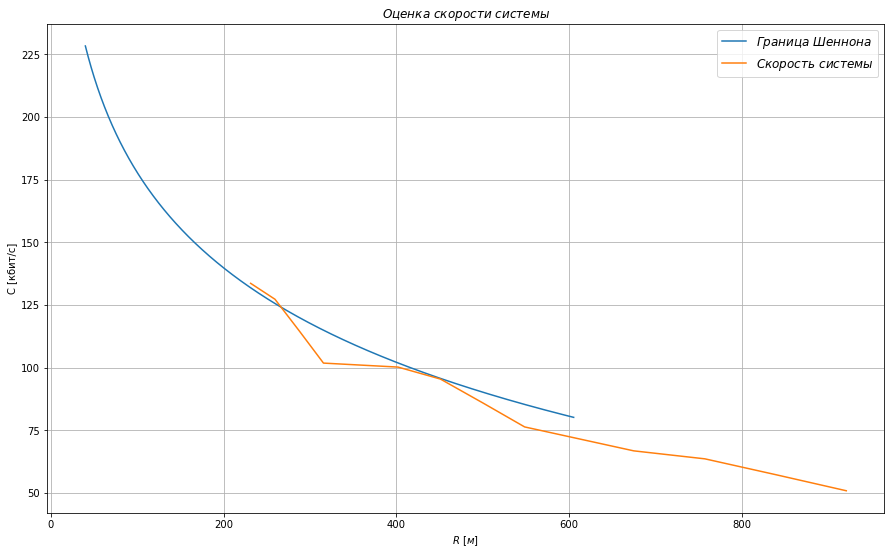

In [1349]:
plt.figure(figsize=(15, 9))
plt.plot(R_massive, C_calc, label = r'$Граница\ Шеннона$')
plt.plot(rSot_calc, C_sys, label = r'$Скорость\ системы$')
plt.xlabel(r'$R\ [м]$')
plt.ylabel(r'C [кбит/c]')
plt.title(r'$Оценка\ скорости\ системы$')
plt.legend(loc = 'best', fontsize = 12)
plt.grid(True)
plt.show()

## 10. Разработка структуры сигнала 

Структура сигнала включает в себя:
* Длительность символа сообщения
* Метод разделения абонентов в соте (секторе)
* Метод разделения сот (секторов)

Перед непосредственной разработкой структуры сигнала оценим количество реживом работы сотовой системы связи, 

In [101]:
def numberLvl(__SNR):
    __SNR = np.array(__SNR)
    __N = np.sqrt(__SNR + 1)
    for i in range(len(__N)):
        if(__N[i] < 2):
            __N[i] = 1
        elif(__N[i] < 4):
            __N[i] = 2
        elif(__N[i] < 8):
            __N[i] = 4
        elif(__N[i] < 16):
            __N[i] = 8
        elif(__N[i] < 32):
            __N[i] = 16
        elif(__N[i] < 64):
            __N[i] = 32
        elif(__N[i] < 128):
            __N[i] = 64
        elif(__N[i] < 256):
            __N[i] = 128
        else:
            __N[i] = 256
    return __N

In [102]:
def shannonLvl(__dF_ch, __k_pr, __N_res, __m_v, __N):
    dF = __dF_ch / __k_pr
    mimo = min([__m_v, __N_res])
    return 2 * dF * mimo * math.log2(__N) / 1000

In [106]:
N_lvl = numberLvl(SNR_calc)
C_calc_lvl = [shannonLvl(dF_ch, k_pr, N_res, m_v, i) for i in N_lvl]
#print(C_calc_lvl)

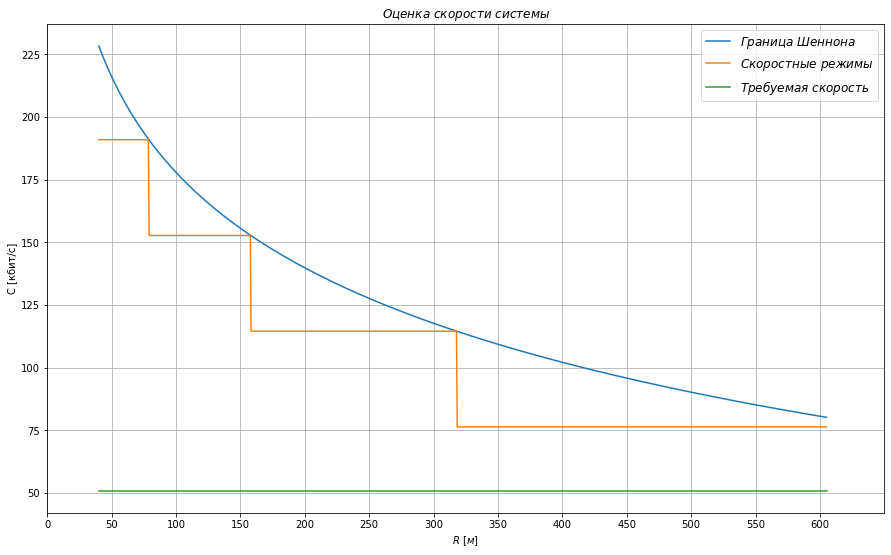

In [109]:
plt.figure(figsize=(15, 9))
plt.plot(R_massive, C_calc, label = r'$Граница\ Шеннона$')
plt.plot(R_massive, C_calc_lvl, label = r'$Скоростные\ режимы$')
plt.plot(R_massive, [C/1000 for i in R_massive], label = r'$Требуемая\ скорость$')
plt.xlabel(r'$R\ [м]$')
plt.ylabel(r'C [кбит/c]')
plt.title(r'$Оценка\ скорости\ системы$')
plt.legend(loc = 'best', fontsize = 12)
plt.grid(True)

plt.xlim(0, 650)
plt.xticks(range(0,650, 50))
plt.show()

Из приведённой графической зависимости можно выделить 4 режима (для обеспечения реализуемой тактовой частоты):

* В случае работы с модуляцией 16QAM
* В случае работы с модуляцией 32QAM
* В случае работы с модуляцией 64QAM
* В случае работы с модуляцией 128QAM

In [123]:
N_lvl_count = [4, 5, 6, 7] # 16 32 64 128

Оценив все возможные режимы работы определим минимальный шаг времени в системе, но перед этим следует оценить дилтельность символа.
* В случае использования `FDMA` длительность символа определяется эффективной шириной канала
* В случае использования `TDMA` или `CDMA` длительность символа определяется шириной частотного диапазона системы

In [118]:
def lcm(a, b):
    return (a * b) // math.gcd(a, b)

def lcmMassive(massive):
    buf = massive[0]
    for i in range(1, len(massive)):
        buf = lcm(buf, massive[i])
    return buf

In [119]:
def taySym(flag):
    if flag == "FDMA":
        return 1/dF_ch
    else:
        return 1/dF_sys 

In [120]:
tay_sym = taySym("FDMA")
print(tay_sym)

2.9105726551699046e-05


Так же оценим время тактирования, которое должно быть кратно длительности бита в символе для любого режима используемого в системе. 

In [121]:
def tactsFunc(__tay_sym, __N_lvl_count):
    return __tay_sym / lcmMassive(__N_lvl_count)

In [124]:
tacts = tactsFunc(tay_sym, N_lvl_count)
print(tacts)

6.929934893261678e-08


In [125]:
lcmMassive(N_lvl_count)

420

Так же следует провести коррекцию времени символа в зависимости от используемого режима многопользовательского доступа

$\left[ 
      \begin{gathered} 
        \tau_{с} + \tau_{такт} \cdot [floor(\frac{\tau_{рас. max}}{\tau_{Т}})+ 1], &  если\ используется\ FDMA \\ 
        \leq \tau_{рас. min}, & если\ используется \ CDMA \\  
        = \tau_{симв}, & если\ используется \ TDMA, \ но\ следует\ добавить\ защитные\ интервалы\
        \tau_{защ} = N_{з} \cdot \tau_{такта} \\ 
      \end{gathered} 
\right.$

Для `TDMA` следует выбирать такое `время защитного интервала`, чтобы оно было больше времени рассеивания максимального. Защитный интервал можно добавлять двумя путями:

* Добавление к каждому симоволу
* Добавление перед каждым слотом

Добавление к каждому символу является избыточным подходом. На практике обычно используется добавление к слотам.

Приведём таблицу типовых времён рассеивания, вызванное многолучевым распространением сигнала для различных видов местности:

|           Параметр          |Город  |Пригород  |   Здание   |
|-----------------------------|-------|----------|------------|
|$\tau$<sub>рас.max</sub>, мкс|  5…12 |    1…7   |   0.1…0.5  |
|$\tau$<sub>рас.ср</sub>, мкс |   1.5 |    0.5   |    <0.1    |
|         В, МГц              | 0.083 |    0.4   |    >1.25   |
|  скорость, кбит/с           | 660-83| 1980-142 | 10000-1980 |

Оценим защитный интервал в случае использования FDMA

In [126]:
t_dif_max = 12e-6

In [127]:
def floor(__m):
    return int(__m)

def protectiveTDMA(__tacts, __t_dif_max, __tay_sym):
    buf = __tacts
    while(buf < __t_dif_max):
        buf += __tacts
    buf -= __tacts
    return __tay_sym + buf

def protectiveFDMA(__tacts, __t_dif_max, __tay_sym):
    buf = __tay_sym + __tacts * (floor(__t_dif_max / __tacts) + 1)
    return buf

In [154]:
#tay_sym_recalc = protectiveTDMA(tacts, t_dif_max, tay_sym)
tay_sym_recalc = protectiveFDMA(tacts, t_dif_max, tay_sym)
print(tay_sym_recalc)

4.1163813265974366e-05


In [155]:
shannon(1/tay_sym_recalc, k_pr, N_res, m_v, SNR_N)

56.682856251799805

In [156]:
1/tay_sym_recalc/k_pr

13496.212121212122

Разрабатываемая система связи предполагает кадровое разделение информации. В домашнем задании рассматривается разработка структуры канала «вниз» (БС -> АС) соответственно необходимо сформировать параметры не менее чем двух каналов:

* Канала данных
* Канала управления

Тем самым можно изобразить пример структуры сигнала для FDMA/TDMA (показан ниже), F<sub>d</sub> – канал данных, F<sub>c</sub> – канал управления, первый индекс – номер базовой станции в кластере, второй индекс – номер канала в пределах базовой станции.

В случае использования TDMA можно наблюдать частотно-временную панораму (ЧВП), то есть распределение посылок от каждого абонента по всему диапазону, где отправка может осуществляться по любому каналу в пределах одного сектора/кластера в зависимости от занятости канала.

Выбор каналов для CDMA и TDMA производится согласно требованиям к многопользовательскому доступу и правилам адресации абонентов.

![Альтернативный текст](signalStructure.png)

Пример структуры кадра канала данных изображён ниже:

![Альтернативный текст](DataСhannel.png)

Пример структуры кадра канала управления изображён ниже:

![Альтернативный текст](ControlChannel.png)

Для расчета параметров нашей системы необходимо рассчитать следующие значения для кадровой структуры сигнала:
* Время кадра 
* Время одного слота 
* Защитный интервал между слотами
* Время ССК (сигнал старта кадра)

In [157]:
def timeFrame(__f0, __tacts):
    liambda = 3e8 / __f0
    v_max = 250 * 1000 / 3600
    max_val = liambda / (2 * v_max) 
    
    buf = __tacts
    while(buf < max_val):
        buf += __tacts
    buf -= __tacts
    
    print("Max Val: ", max_val)
    return buf

In [158]:
T_frame = timeFrame(f0, tacts)
#T_frame = 0.0024
print(T_frame)

Max Val:  0.0010285714285714286
0.001028540936857739


In [203]:
def T_protSlots(__tay_sym, __t_dif_max):
    print(__t_dif_max / __tay_sym)
    ceil = int(__t_dif_max / __tay_sym) + 1 
    return __tay_sym * ceil

In [204]:
T_prot_slots = T_protSlots(tay_sym_recalc, t_dif_max) #tay_sym_recalc
print(T_prot_slots)

0.29151818181818184
4.1163813265974366e-05


In [205]:
def timeCCK(__tay_sym):
    N_cck = 3 # обычно для ССК выделяют не менее 3 символов, чтобы смогли различть от других окон в кадре
    return N_cck * __tay_sym

In [206]:
T_cck = timeCCK(tay_sym_recalc)
print(T_cck)

0.0001234914397979231


In [207]:
def numberSlots(__T_frame, __b, __T_cck, __tay_prot, __tay_sym, __N_sl):
    time = __T_frame - __T_cck
    timeSlotsAndProt = __tay_prot + __N_sl * __tay_sym
    
    slotsInFrame = 1
    flag = 0
    while(slotsInFrame * (flag * __tay_prot + __N_sl * __tay_sym) < time):
        slotsInFrame += 1
        flag = 1
    slotsInFrame -= 1
    
    return slotsInFrame

def usefulSpeed(__N_sl, __N_slots, __b, __k_ncc, __m_v, __T_frame):
    N_b = 1/__b
    return (N_b * __N_sl * __N_slots * __k_ncc * __m_v) / (__T_frame * 1000)
    

In [237]:
N_sl = 3 # количество символов в слоте 
n_re = 1/7
N_slots = numberSlots(T_frame, n_re, T_cck, T_prot_slots, tay_sym_recalc, N_sl) # количестов слотов 
print(N_slots)

5


In [238]:
R_useful = usefulSpeed(N_sl, N_slots, n_re, k_ncc, m_v, T_frame)
print(R_useful)

68.05757310336588


Чем меньше количество слотов в кадре, тем большей скорости мы можем достичь (не тратим временной ресурс на защитные интервалы). Однако с увеличением числа информационных бит в одном слоте повышается эффект вредного воздействия многолучёвого распространения, тем самым использование слотов с большим количеством информационных бит не оправдывает себя. 

При уменьшении расстояния абонента от БС возможно переключение на режим большей скорости. Как следствие повышется количество информационных бит в слоте, повышается негативное воздействие многолучёвого распространения. Следует перерасмотреть количество слотов в структуре сигнала. Ниже приведена таблица количества используемых слотов в кадре от скоростного режима:

|Расстояние от БС, м | Число уровней | Количество слотов | Количество информационных бит | Полезная скорость, кбит/c |
|--------------------|---------------|-------------------|-------------------------------|---------------------------|
|      320…760       |       16      |         1         |               84              |           54.4            |
|      160…320       |       32      |         2         |               90              |           58.3            |
|       80…160       |       64      |         3         |              108              |            70             |
|       40…80        |      128      |         5         |              105              |            68             |

Оценим длительности каждого блока в канале управления:

* адрес абонента 
* режим скорости
* handover
* номер ответного канала  (совмещение технического запроса и блока вызова)

P.S. Вместо отдельного блока вызова абонента допускается учет вызова абонента в блоке номера ответного канала, если номер ответного канала соответствует каналу управления – производится опрос абонента на его наличие, если это канал данных – полагаем что это вызов.

Для синхронизации кадра в канале управления можно использовать значение ССК в случае использования `FDMA` или `TDMA`, если в кадре не больше 10 слотов

#### Определим количество символов необходимых для записи адреса абонента

In [239]:
def numberSymAd(__N_ab_in_sot, __k_ncc, __b):
    N_b = 1/__b
    ceil1 = int(math.log2(__N_ab_in_sot)) + 1
    ceil2 = int(ceil1 / (__k_ncc * N_b)) + 1
    return ceil2

In [240]:
N_adress = numberSymAd(N_ab_in_sot, k_ncc, b)
print(N_ab_in_sot)
print(N_adress)

4418
5


#### Определим количество символов необходимых для определения скоростного режима

In [241]:
def speedMode(__N_lvl_count, __k_ncc, __b):
    N_b = 1/__b
    ceil1 = int(math.log2(len(__N_lvl_count))) + 1
    ceil2 = int(ceil1 / (__k_ncc * N_b)) + 1
    return ceil2

In [242]:
N_mode = speedMode(N_lvl_count, k_ncc, b)
print(N_mode)

2


#### Определим количество символов необходимых для определения канала управления

In [243]:
def channelManagement(__M, __k_ncc, __b):
    N_b = 1/__b
    ceil1 = int(math.log2(__M)) + 1
    ceil2 = int(ceil1 / (__k_ncc * N_b)) + 1
    return ceil2

In [244]:
N_ch_man = channelManagement(M, k_ncc, b)
print(N_ch_man)

4


#### Определим количество символов необходимых для определения handover

In [245]:
def handover(__N_adress, __N_cl, __N_sec, __k_ncc, __b):
    N_b = 1/__b
    ceil1 = int(math.log2(__N_cl * __N_sec)) + 1
    ceil2 = int(ceil1 / (__k_ncc * N_b)) + 1
    return __N_adress + ceil2

In [246]:
N_handover = handover(N_adress, N_cl, N_sec, k_ncc, b)
print(N_handover)

6


Общее количество символом для обеспечения блоков управления:

In [251]:
N_man = N_adress + N_mode + N_ch_man + N_handover
T_man_slots = tay_sym_recalc * N_man
print(T_man_slots)
print(T_frame)

0.0006997848255215643
0.001028540936857739


In [248]:
T_man = T_man_slots + T_prot_slots + T_cck
print("Выделенное время в канале управление на служебные блоки:", T_man)
print("Поместилась ли вся служебная часть в кадр ?", T_man < T_frame)

Выделенное время в канале управление на служеюные блоки: 0.0008644400785854618
Поместилась ли вся служебная часть в кадр ? True


In [255]:
N_ab_in_ch_control = 1

Дополнительно к обязательным частям системы управления и передачи данных необходимо разместить пилот-сигнал, для этого необходимо оценить его минимальную длительность:

$ 
\begin{cases}
  T_{pilot} \geq \tau_{символа} \cdot ceil(\frac{ceil(\log_2 (N_{бит/блок}) \cdot b \cdot B_{реж.ск.})}{k_{ПУ}}); \\
  T_{pilot} = k \cdot \tau_{символа},\ k \in N.  
\end{cases}
$

B<sub>реж.ск.</sub> – базой сигнала соответствующая режиму скорости передачи данных.

Расположение пилот-сигнала допустимо в следующих вариантах:

>В начале кадра управления абонентами для всех абонентов, тогда пилот сигнала считается общим для всех абонентов кадра управления и допустимо использовать наибольшую базу сигналов в системе;

>В начале блока управления для соответствующего абонента, в этом случае база сигнала должна соответствовать режиму скорости для соответствующего абонента, а выделяемый в кадре временной ресурс соответствует наименьшей возможной;

>В начале кадра данных, соответственно база соответствует режиму скорости, однако необходимо размер блока данных соответственно сократится.

В нашем случае количество слотов не превышает 10, следовательно можно в качестве пилот сигнала использовать ССК

In [252]:
def pollingTime(__T_frame, __M_tech, __N_ab_in_ch_control, __N_ab_in_sot):
    first = __T_frame / (__N_ab_in_ch_control * __M_tech)
    return first * __N_ab_in_sot

Введём количество технических каналов и произведём пересчёт параметров:

In [262]:
M_tech = 3

_N_ab_in_sot = 1

while(1):
    _A_sys = _N_ab_in_sot * A_ab
    _P_d_calc = Erlang(M-M_tech, _A_sys)
    if(_P_d_calc < P_d):
        _N_ab_in_sot += 1
    else:
        break

_N_ab_in_sot -= 1
_A_sys = _N_ab_in_sot * A_ab
_P_d_calc = Erlang(M-M_tech, _A_sys)

print("Число абонентов в соте: ", _N_ab_in_sot)
print("Вероятность отказа расчётная: ", _P_d_calc)
print("Вероятность отказа по условию : ", P_d)

print()

_S_sot, _R_sot = SquareSot(_A_sys, A_ab, N_sec, L1, L2, N_ab)

print()

_N_sot = numberBS(A_ab, _A_sys, N_ab, N_sec)

print()

_loss = propagationLoss(f0, h_bs, _R_sot, h_ab, "City") # [City, Suburb, Countryside]
print("Потери на распространение составляют: ", _loss, "[дБ]")

print()

_P_trans = powerTransmitter(SNR_N, M-M_tech, N_sec, _R_sot, G_tran_N, f0, _loss, L_ob, C, T_sh, m_p) 
print("Суммарная мощность подводимая к БС:", _P_trans, "[Вт]") # суммарная мощность передатчиков БС не более 10...50 Вт

Число абонентов в соте:  4374
Вероятность отказа расчётная:  8.647649569777892e-07
Вероятность отказа по условию :  8.7e-07

Площадь соты составляет [кв.м]:  941868.0
Радиус соты составляет [м]:  602.1006246694951

Число базовых станций, обеспечивающих покрытие заданной зоны 343

L0: 94.47953963634234
alfa: 0.4435887794172979
Потери на распространение составляют:  26.40314397319088 [дБ]

Потери: 1203.1351009092841
Суммарная мощность подводимая к БС: 1.073756241084522 [Вт]


In [263]:
T_polling = pollingTime(T_frame, M_tech, N_ab_in_ch_control, _N_ab_in_sot)
print(T_polling)

1.4996126859385837


Время опроса должно быть как минимум меньше 3.5 с. 

Построенная система связи удовлетворяет заданным требованиям в соответствии с вариантом 